# 학습된 MPG 예측 모델을 바탕으로 Parital Dependency plot을 그려보자

In [24]:
from __future__ import absolute_import, division, print_function, unicode_literals

import pathlib

import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns
import numpy as np

import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

print(tf.__version__)

1.13.1


## 학습 데이터 로딩

In [19]:
normed_train_dataset = pd.read_pickle('train_dataset.pickle')
train_labels = pd.read_pickle('train_labels.pickle')
normed_train_dataset.head()

,Cylinders,Displacement,Horsepower,Weight,Acceleration,Model Year,USA,Europe,Japan
146,-0.869348,-1.009459,-0.784052,-1.025303,-0.379759,-0.516397,0.774676,-0.465148,-0.495225
282,-0.869348,-0.530218,-0.442811,-0.118796,0.624102,0.843910,0.774676,-0.465148,-0.495225
69,1.483887,1.482595,1.447140,1.736877,-0.738281,-1.060519,0.774676,-0.465148,-0.495225
378,-0.869348,-0.865687,-1.099044,-1.025303,-0.308055,1.660094,0.774676,-0.465148,-0.495225
331,-0.869348,-0.942365,-0.994047,-1.001603,0.875068,1.115971,-1.286751,-0.465148,2.012852


## 모델 로딩

In [5]:
model = keras.models.load_model('auto-mpg.h5')
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                640       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 4,865
Trainable params: 4,865
Non-trainable params: 0
_________________________________________________________________


# PDP Plot

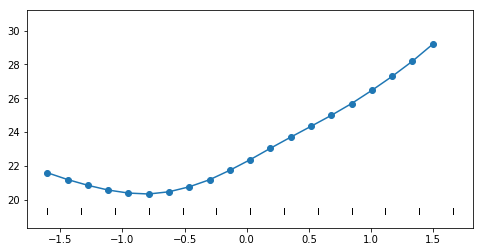

In [53]:
def make_intervals(min_val, max_val, n_interval):
    step = (max_val - min_val) / n_interval
    intervals = [ (min_val+i*step, min_val+(i+1)*step) for i in range(n_interval)]
    return intervals

def partial_dependency_plot(feature_name, n_interval, features, labels):
    stats = train_dataset[feature_name].describe()
    intervals = make_intervals(stats['min'], stats['max'], n_interval)
    
    # for each use of lower bound in intervals, 
    x_ = []
    y_ = []
    for lower, upper in intervals:
        x_.append(lower)
        
        # make artificial features with replacing feature value with lower bound value
        artificial_features = features.copy()
        artificial_features[feature_name] = lower
        
        # make predictions over artifically created features
        predictions = model.predict(artificial_features).flatten()
        avg_prediction = np.average(predictions)
        y_.append(avg_prediction)
    
    fig, ax = plt.subplots(figsize=(8,4))
    
    # draw curve for avg prediction
    ax.plot(x_, y_, '-o')
    
    # draw original feature distribution as rugged plot
    
    ax.plot(features[feature_name], [min(y_)-1]*len(features), '|', color='k')

    #plt.plot(features[feature_name], np.full(len(features), 0.1))

    plt.ylim(min(y_)-2, max(y_)+2)
    plt.show()

# Cylinders, Displacement, Horsepower, Weight, Acceleration, Model Year
partial_dependency_plot('Model Year', 20, normed_train_dataset, train_labels)

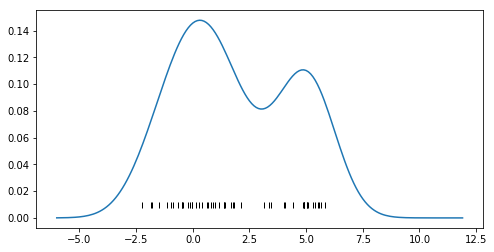

In [41]:
from scipy import stats
import numpy as np
import matplotlib.pyplot as plt

sample = np.hstack((np.random.randn(30), np.random.randn(20)+5))
density = stats.kde.gaussian_kde(sample)

fig, ax = plt.subplots(figsize=(8,4))

x = np.arange(-6,12,0.1)
ax.plot(x, density(x))

ax.plot(sample, [0.01]*len(sample), '|', color='k')


In [42]:
sample

array([ 0.12117278,  0.29380059, -1.14692276, -1.84278875,  0.96647488,
       -0.64375635, -0.86091438, -0.47071785,  1.76489814, -2.22731834,
        1.38959366, -1.49367045,  0.80873569,  1.17009538, -0.4226486 ,
       -0.01276919,  1.8043875 ,  0.67675556, -0.21640175,  1.3695447 ,
       -0.94961548,  1.41658119,  0.61666564, -0.10367405,  1.68650174,
       -0.45597736, -0.02924115, -1.78034878,  0.87385834,  0.39666889,
        3.3610471 ,  4.04886864,  3.45314691,  4.4196961 ,  5.08050774,
        5.03719619,  4.92107421,  5.30456776,  5.52519195,  5.55531204,
        2.14795458,  4.00627165,  5.03786294,  5.83140537,  5.37248716,
        4.91578611,  4.86831933,  5.64775875,  4.9281936 ,  3.15617402])